In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
train_clean_path = os.path.join("data", "train-clean-100.csv")

In [10]:
train_clean_df = pd.read_csv(train_clean_path, index_col=0)
train_clean_df.head()

,REAL TEXT,BOOK TITLE,DURATION
0,TILL THEY WOULD FINALLY CIRCLE ROUND AND ROUND...,"The Life of Hon. William F. Cody, Known as Buf...",17.67
1,AS CINCINNATUS OR CORNELIA NOW TO SUCH A QUIET...,"Divine Comedy, Longfellow's Translation, Complete",25.10
2,LOUISE AND BETH HAVING AT LAST FULL KNOWLEDGE ...,Aunt Jane's Nieces,17.11
3,MODE BEARD THE OYSTERS AND SCALD THEM IN THEIR...,The Book of Household Management,5.79
4,SHE SAID SHE WAS NOT ABSOLUTELY CERTAIN OF THE...,The Professor,7.95


In [11]:
train_clean_df.describe()

,DURATION
count,305.000000
mean,19.675639
std,15.336142
min,0.540000
25%,9.170000
50%,17.020000
75%,25.110000
max,127.620000


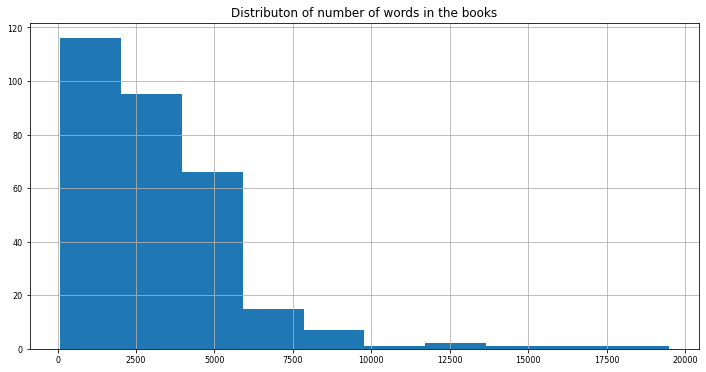

In [12]:
train_clean_df['NUM WORDS'] = train_clean_df['REAL TEXT'].apply(lambda x: len(x.split()))
train_clean_df[['NUM WORDS']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8)
plt.title("Distributon of number of words in the books")
plt.show()

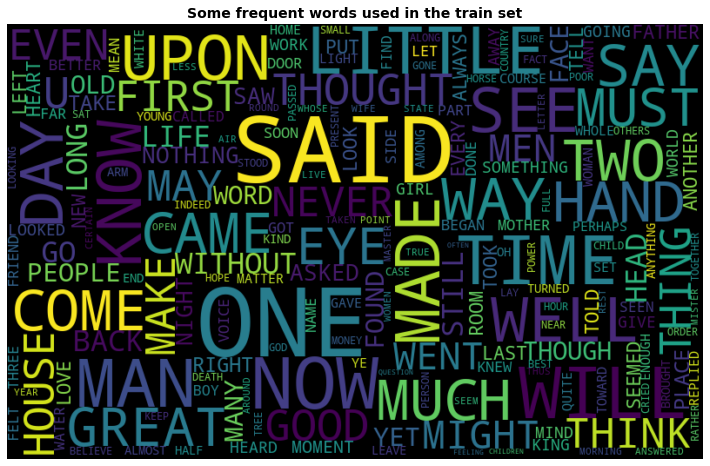

In [13]:
from wordcloud import WordCloud
all_words = ''.join([word for word in train_clean_df['REAL TEXT'][0:100000]])
all_words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Some frequent words used in the train set", weight='bold', fontsize=14)
plt.show()

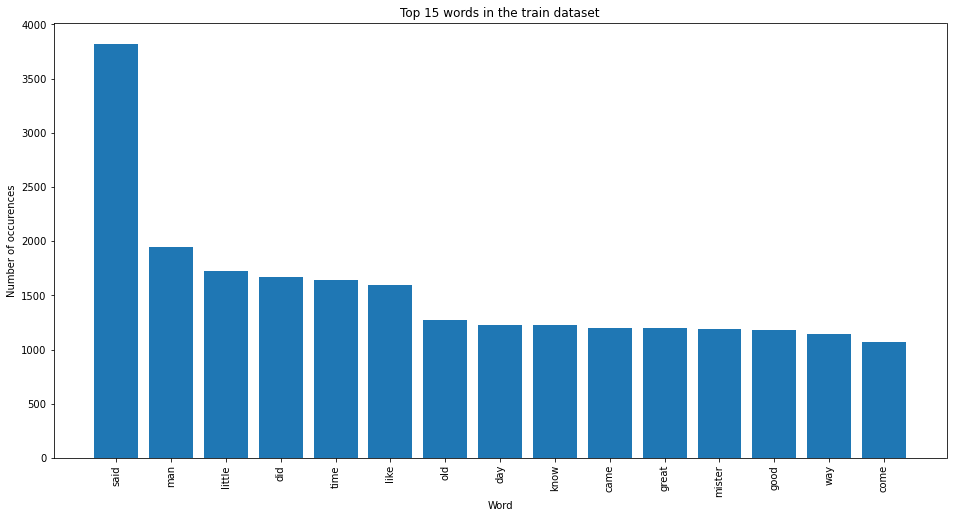

In [15]:
def get_top_n_words(corpus, n=10):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]
words = []
word_values = []
for i,j in get_top_n_words(train_clean_df['REAL TEXT'],15):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 15 words in the train dataset');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()